# Constant-alpha Monte Carlo on Frozen Lake 1




### Code Setup

In [1]:
# import gymnasium as gym
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import savgol_filter
# 
# 
# def constant_alpha_mc(alpha=0.08, gamma=0.95, episodes=8000, T=100, epsilon=0.05, cost_of_living=-0.01, is_slippery=False, frequent_rewards=True):
#     # Choose environment
#     env = gym.make("FrozenLake8x8-v1", is_slippery=is_slippery)
#     FrequentRewards = frequent_rewards # When False the original environment rewards are used
#     
#     Q = np.zeros([env.observation_space.n, env.action_space.n])
#     rewards_per_episode = []
#     q_values_at_intervals = [] # Store Q-values at intervals
#     
#     for episode in range(episodes):
#         state, prob = env.reset()
#         total_reward = 0
#         episode_states = []
#         episode_actions = []
#         episode_rewards = []
#     
#         for step in range(T):
#             if np.random.rand() < epsilon:
#                 action = np.random.choice(env.action_space.n)
#             else:
#                 action = np.argmax(Q[state, :])
#     
#             new_state, reward, terminated,truncated, info = env.step(action)
#             if FrequentRewards:
#                 if terminated and reward == 0: # agent fall in the hole!
#                     reward = reward - 1
#                     print(f"Episode {episode} diead after {step + 1} with reward {total_reward - 1}.")
#     
#             reward = reward + cost_of_living
#             episode_states.append(state)
#             episode_actions.append(action)
#             episode_rewards.append(reward)
#             total_reward += reward
#             state = new_state
#             if terminated:
#                 if reward == 1 + cost_of_living:
#                     print(f"Episode {episode} finished after {step + 1} steps with reward {total_reward} . Epsilon is {epsilon}, LR {alpha} Success!")
#                 break
#     
#         rewards_per_episode.append(total_reward)
#     
#     
#         # Calculate returns and update Q-values
#         G = 0
#         for t in range(len(episode_states) - 1, -1, -1):
#             state = episode_states[t]
#             action = episode_actions[t]
#             reward = episode_rewards[t]
#             G = gamma * G + reward
#             Q[state][action] += alpha * (G - Q[state][action])
#         # Store Q-values at intervals (e.g., every 100 episodes)
#     
#         if (episode + 1) % (episodes // 4) == 0:
#             q_values_at_intervals.append(np.copy(Q)) # Store a copy of Q-values
# 
# 
#     plt.figure(figsize=(10, 2))
#     plt.text(0.5, 0.5, f'RAlpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}', fontsize=12, ha='center')
#     plt.title('Hyper-parameters')
#     plt.axis('off')
#     plt.show()
# 
# 
#     # Plotting rewards per episode
#     plt.figure(figsize=(15, 5))
#     plt.subplot(1, 2, 1)
#     plt.plot(rewards_per_episode, label='Total Reward')
#     plt.title('Rewards per Episode')
#     plt.xlabel('Episode')
#     plt.ylabel('Total Reward')
# 
#     # Calculate moving average for a cleaner plot
#     moving_average_window = episodes // 120
#     moving_averages = savgol_filter(rewards_per_episode, moving_average_window, 3)
#     plt.plot(moving_averages, label=f'Moving Average (Window {moving_average_window})', color='orange')
#     plt.legend()
# 
#     # Plotting the heatmap of Q-values at intervals
#     fig, ax = plt.subplots(1, len(q_values_at_intervals), figsize=(15, 5))
#     for i, q_values in enumerate(q_values_at_intervals):
#         ax[i].imshow(q_values, cmap='hot', interpolation='nearest')
#         ax[i].set_title(f'Q-Values at Episode {(episodes // 4) * (i + 1)}')
#         ax[i].axis('off') # Turn off axis
#         plt.colorbar(ax[i].imshow(q_values, cmap='hot', interpolation='nearest'), ax=ax[i])
# 
#     # Test phase without exploration
#     state, prob = env.reset()
#     total_reward = 0
# 
#     for step in range(T):
#         action = np.argmax(Q[state, :])
#         new_state, reward, terminated, truncated, info = env.step(action)
#         if FrequentRewards and terminated and reward == 0:
#             reward = reward - 1
#         reward = reward + cost_of_living
#         total_reward += reward
#         state = new_state
#         if terminated:
#             break
# 
#     # Plot the reward for the test run
#     plt.figure(figsize=(10, 2))
#     plt.text(0.5, 0.5, f'Reward for test run: {total_reward}', fontsize=15, ha='center')
#     plt.title('Reward for Test Run')
#     plt.axis('off')
#     plt.show()
# 
#     # Display plots and pause to show the graphs
#     plt.show()
#     input('Press any key to exit')

## Warm-Up Question: Note the exploration mechanism and the learning mechanism of constant alpha mc. 





### Exploration Mechanism:
The exploration mechanism used in the given constant $\alpha$ Monte Carlo (MC) method is the epsilon-greedy policy. This policy selects an action randomly with a probability of epsilon ($\varepsilon$), and with a probability of ($1-\varepsilon$), it selects the action that has the highest Q-value for the current state. In the source code, $\varepsilon$  is set to 0.05, meaning there is a 5% chance of selecting a random action and a 95% chance of selecting $a^*$ at state $s$

$$
a^\ast=\ argmax(Q(s,a))
$$ 

### Learning Mechanism:
The learning mechanism involves updating the $Q$-values using a constant learning rate $\alpha$. After each episode, the algorithm calculates the returns $G$ for easch state actioon pair $(s,a)$ encountered during the episode. The $Q$-values are then updated using the constant $\alpha$ Monte Cralo formula:
$$Q(s,a)\gets Q(s,a)+\alpha(G-Q(s,a))$$


#### General Monte Carlo (MC) Method for Q-Function

The general MC method updates the Q-function $Q_\pi(s, a)$ using the average returns observed for each state-action pair $(s, a)$ over all episodes:

$$ Q_\pi(s, a) = \frac{1}{C(s, a)} \sum_{m=1}^{M} \sum_{\tau=0}^{T_m-1} I[(s_{\tau}^m, a_{\tau}^m) = (s, a)] G_{\tau}^m $$

Where:
- $ C(s, a) $ is the count of how many times the state-action pair $(s, a)$ has been visited.
- $ G_{\tau}^m $ is the return observed starting from time step $\tau$ in episode $m$.
- $ I[(s_{\tau}^m, a_{\tau}^m) = (s, a)] $ is an indicator function that is 1 if the state-action pair $(s, a)$ is visited at time $\tau$ in episode $m$, and 0 otherwise.
This general form requires storing and processing all the data from all episodes, which can be computationally expensive and memory-intensive, especially for complicated environments so long episodes.

#### Incremental Update for Q-Function

To avoid using all the samples every time, we can incrementally update the Q-function. The incremental update formula is:

$$ Q(s_t^m, a_t^m) \leftarrow Q(s_t^m, a_t^m) + \frac{1}{C(s_t^m, a_t^m)} \left(G_t^m - Q(s_t^m, a_t^m)\right) $$

Here:
- $ Q(s_t^m, a_t^m) $ is the Q-value for the state-action pair $(s_t^m, a_t^m)$ at time step $t$ in episode $m$.
- $ G_t^m $ is the return observed from time step $t$ in episode $m$.
- $ \frac{1}{C(s_t^m, a_t^m)} $ is the learning rate that decreases as the count of visits to $(s_t^m, a_t^m)$ increases.

#### Constant Alpha-MC for Q-Function

Instead of using a decaying learning rate $ \frac{1}{C(s_t^m, a_t^m)} $, we can use a constant learning rate $\alpha$to simplify overall formula. The update formula becomes:

$$ Q(s_t^m, a_t^m) \leftarrow Q(s_t^m, a_t^m) + \alpha \left(G_t^m - Q(s_t^m, a_t^m)\right) $$

Where:
- $ \alpha $ is a constant learning rate (e.g., $\alpha = 0.08$ as given in the provided code).



## Keep the hyper-parameters the same as the original code. First, run the code with the slippery environment being turned off: is_slippery=False

Episode 6 diead after 69 with reward -1.6800000000000004.
Episode 9 diead after 63 with reward -1.6200000000000003.
Episode 12 diead after 19 with reward -1.18.
Episode 13 diead after 89 with reward -1.8800000000000006.
Episode 20 diead after 9 with reward -1.08.
Episode 21 diead after 91 with reward -1.9000000000000006.
Episode 28 diead after 83 with reward -1.8200000000000005.
Episode 33 diead after 91 with reward -1.9000000000000006.
Episode 42 diead after 81 with reward -1.8000000000000005.
Episode 67 diead after 68 with reward -1.6700000000000004.
Episode 89 diead after 41 with reward -1.4000000000000001.
Episode 95 diead after 94 with reward -1.9300000000000006.
Episode 138 diead after 65 with reward -1.6400000000000003.
Episode 158 diead after 41 with reward -1.4000000000000001.
Episode 161 diead after 46 with reward -1.4500000000000002.
Episode 170 diead after 57 with reward -1.5600000000000003.
Episode 176 diead after 99 with reward -1.9800000000000006.
Episode 179 diead after

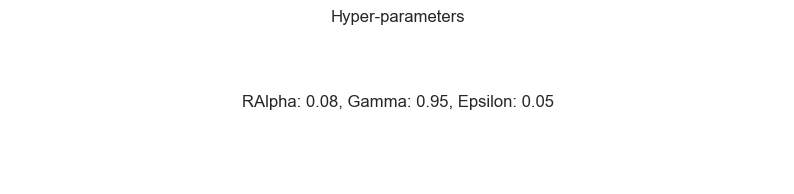

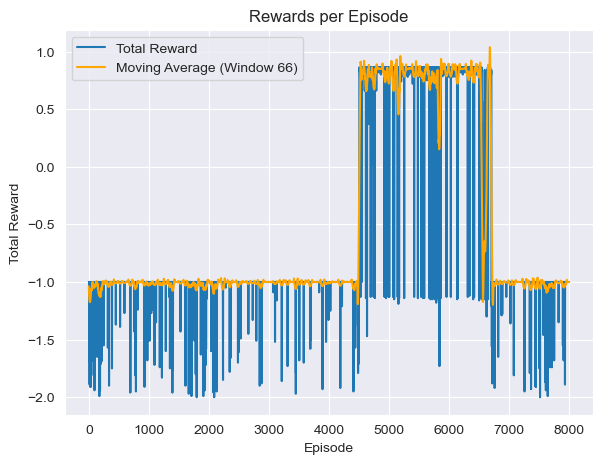

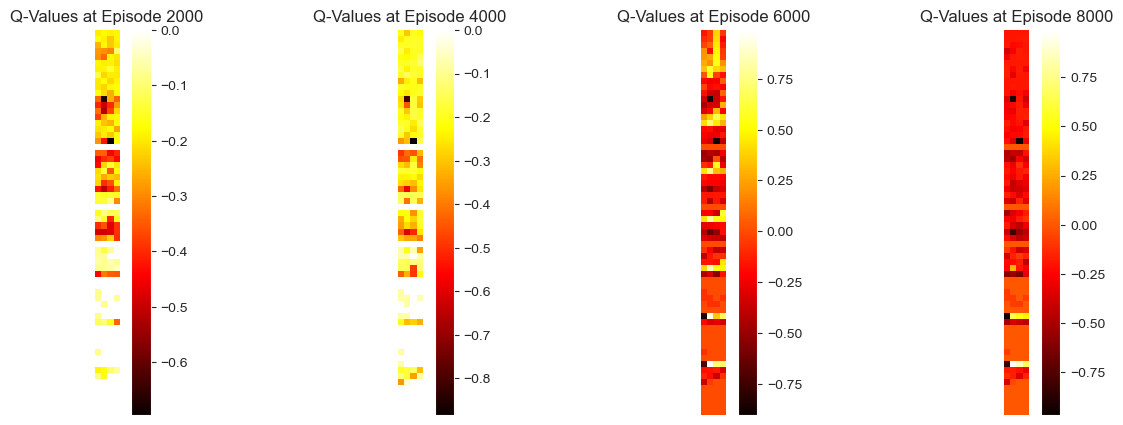

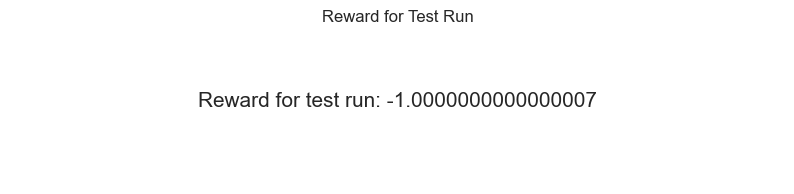

In [2]:
constant_alpha_mc(is_slippery=False,episodes=8000)

#### Analyse and explain results:

The constant $\alpha$ mc correctly determined optimal policy for the non-slippery Frozen Lake environment with initial hyperparameters as seen from test run with result of 0.86, which means it took 16 steps which is minimal for this enviornment.

The graph of total reward per episode shows several distinct phases. Initially, during the first 1000 episodes, the agent's performance is poor, with highly negative rewards as it explores and learns about the environment starting with zero Q-values.


Then, the pattern of rising rewards followed by sharp drops repeats. The peaks correspond to periods where the agent refines its policy and finds more efficient paths, while the drops are due to ongoing exploration and occasional suboptimal actions.

The heatmaps of Q-values at intervals show gradual stabilization, indicating that despite the peaks and drops in rewards, the agent is consistently accumulating knowledge about state-action pairs. By episode 8000, the Q-values are more refined, with higher values for more rewarding actions.

Overall this is clear that 8000 episodes is barely enough to learn the optimal policy for this environment.

##### Why Long Drops and Sudden Jumps Structure Occur

In a deterministic environment like the non-slippery Frozen Lake, actions have predictable outcomes. Once the agent falls into suboptimal states, it requires several episodes to recover and update the Q-values. However, once the agent discovers a significantly better path, the Q-values improve rapidly, leading to sudden jumps in performance.

The learning process shows long periods of poor performance due to the epsilon-greedy policy and constant alpha updates, with the agent frequently exploring suboptimal paths. Sudden improvements occur when better strategies are discovered. The drops are not just from random actions but also from the agent taking time to unlearn poor policies before finding better ones.



## Second, compare the performance when is_slippery=True

Episode 1 diead after 21 with reward -1.2.
Episode 3 diead after 30 with reward -1.29.
Episode 5 diead after 9 with reward -1.08.
Episode 6 diead after 33 with reward -1.32.
Episode 7 diead after 44 with reward -1.4300000000000002.
Episode 8 diead after 25 with reward -1.24.
Episode 9 diead after 10 with reward -1.09.
Episode 10 diead after 13 with reward -1.1199999999999999.
Episode 11 diead after 11 with reward -1.1.
Episode 12 diead after 20 with reward -1.19.
Episode 13 diead after 18 with reward -1.17.
Episode 14 diead after 24 with reward -1.23.
Episode 15 diead after 45 with reward -1.4400000000000002.
Episode 16 diead after 40 with reward -1.3900000000000001.
Episode 19 diead after 38 with reward -1.37.
Episode 22 diead after 32 with reward -1.31.
Episode 23 diead after 16 with reward -1.15.
Episode 24 diead after 20 with reward -1.19.
Episode 25 diead after 7 with reward -1.06.
Episode 26 diead after 74 with reward -1.7300000000000004.
Episode 27 diead after 57 with reward -1.

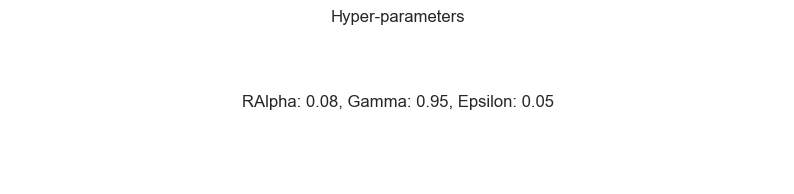

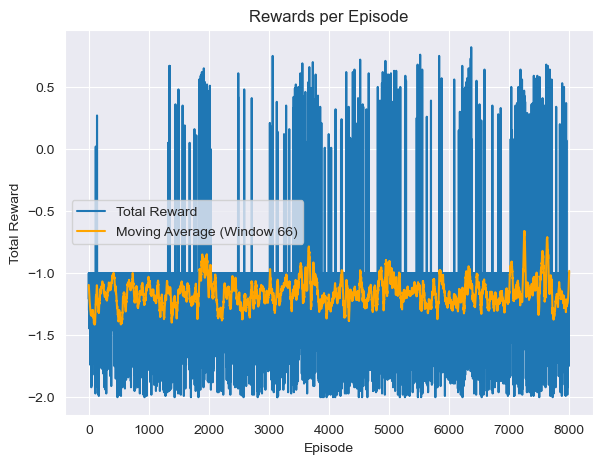

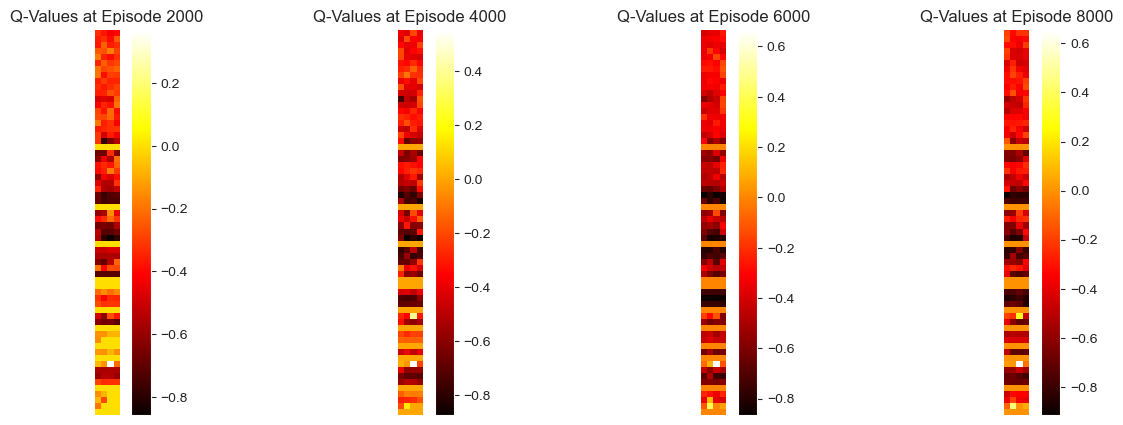

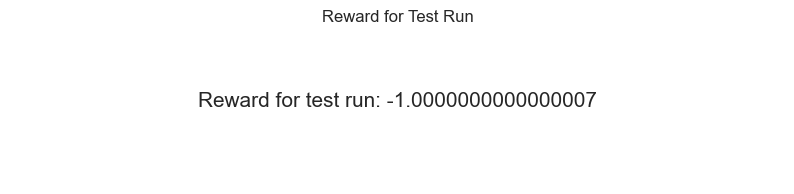

In [3]:
constant_alpha_mc(is_slippery=True)

Since `is_slippery=True`, turns environment to non-deterministic, agent couldn't find the optimal policy in 8000 episodes. non-deterministic setup shows notable worse performance than the deterministic one, indicating the need to increase the number of episodes.

## Turn is_slippery=False, pay attention to the range of values Total reward can get, and relate that to the reward structure of the environment when  FrequentRewards = True

Episode 4 diead after 77 with reward -1.7600000000000005.
Episode 7 diead after 28 with reward -1.27.
Episode 10 diead after 68 with reward -1.6700000000000004.
Episode 11 diead after 45 with reward -1.4400000000000002.
Episode 15 diead after 72 with reward -1.7100000000000004.
Episode 16 diead after 85 with reward -1.8400000000000005.
Episode 27 diead after 64 with reward -1.6300000000000003.
Episode 30 diead after 70 with reward -1.6900000000000004.
Episode 39 diead after 42 with reward -1.4100000000000001.
Episode 47 diead after 56 with reward -1.5500000000000003.
Episode 56 diead after 69 with reward -1.6800000000000004.
Episode 57 diead after 77 with reward -1.7600000000000005.
Episode 71 diead after 62 with reward -1.6100000000000003.
Episode 82 diead after 53 with reward -1.5200000000000002.
Episode 88 diead after 55 with reward -1.5400000000000003.
Episode 91 diead after 79 with reward -1.7800000000000005.
Episode 105 diead after 10 with reward -1.09.
Episode 115 diead after 39

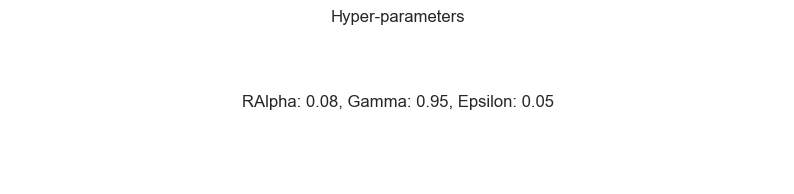

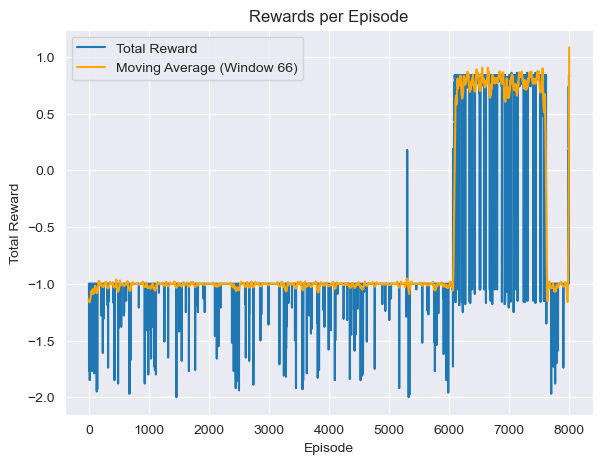

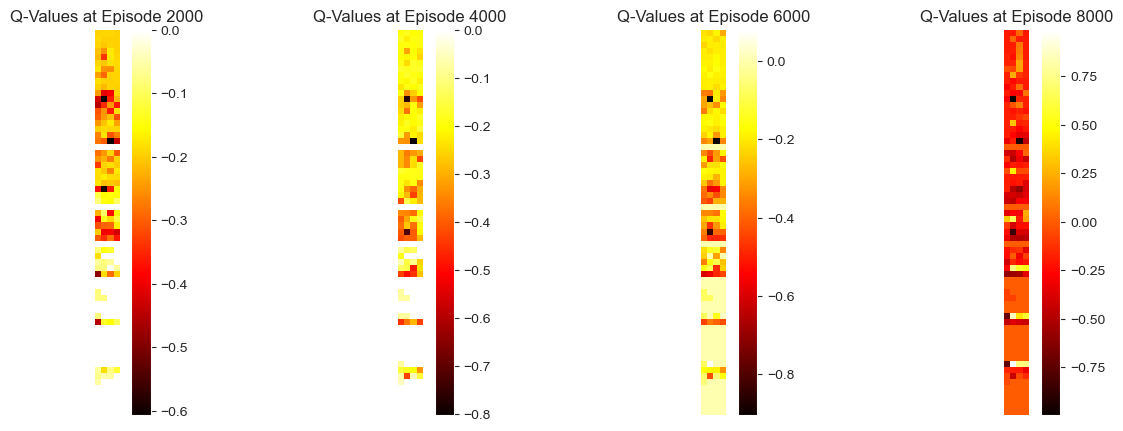

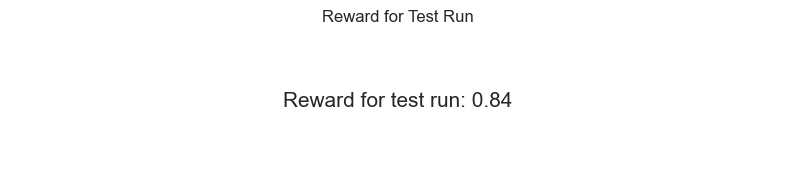

In [4]:
constant_alpha_mc(is_slippery=False, frequent_rewards=True)

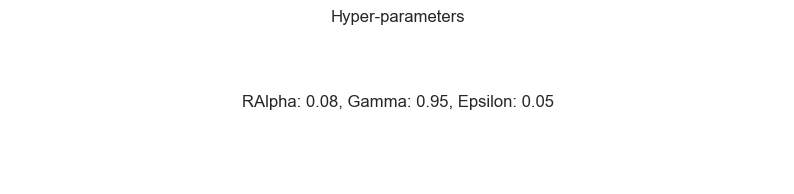

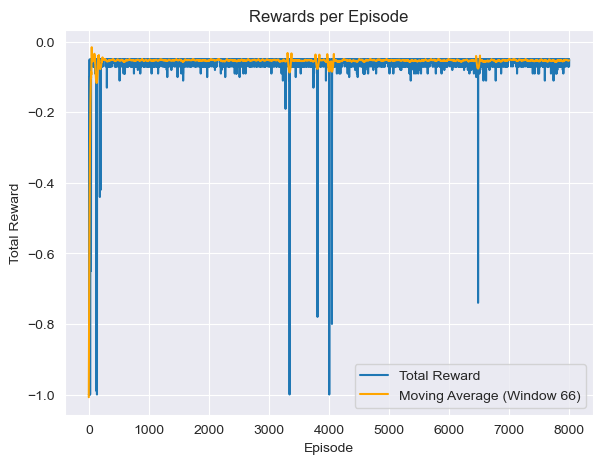

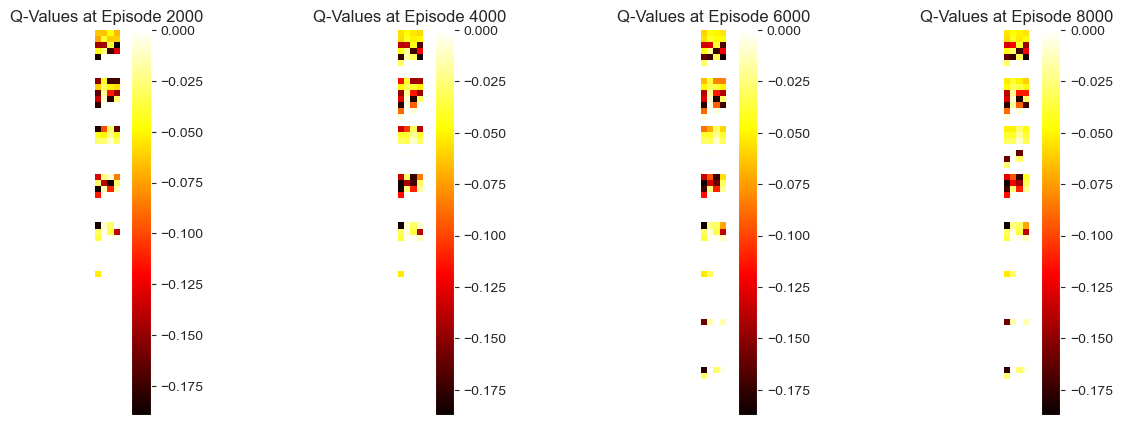

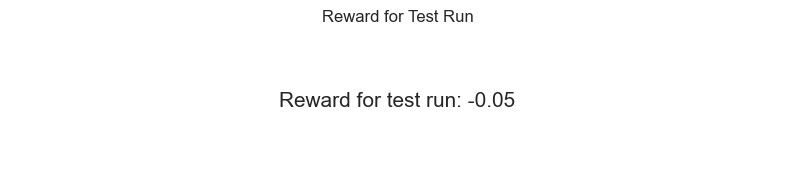

In [5]:
constant_alpha_mc(is_slippery=False, frequent_rewards=False)

With Frequent rewards set to True, we could get -1 for reaching terminal state which is not finish(reward = 0) which make it possible to get minimal reward -2 (`100 steps` $\cdot$ `cost_of_living` - `dying_penalty(-1)`) and maximum reward is (1 - `minimal numbers of steps` $\cdot$ `cost_of_living`).
#### So for `Frequent reward = True` $R \in [-2,1-\lambda]$, where $\lambda$ is (`minimal numbers of steps` $\cdot$ `cost_of_living`)

With Frequent rewards set to False, the only possible rewrard for end state is 1 so the minimal reward is -1 (`100 steps` $\cdot$ `cost_of_living` + 0) and maximum reward is (1 - `minimal numbers of steps` $\cdot$ `cost_of_living`).
#### So for `Frequent reward = True` $R \in [-1,1-\lambda]$, where $\lambda$ is (`minimal numbers of steps` $\cdot$ `cost_of_living`)

## Main Question:  Now start slightly perturbing the hyper-parameters

### Alpha ($\alpha$) learning rate

The learning rate is constant which define how much the Q-values during one episode are used to update state-action pairs $(s, a)$ in Agents Q-table (Policy).

The reward can be seen as a function of all Q-table entries, forming an n-dimensional graph representing the value of state-action pairs across the entire policy space, so the idea is to find the maximum on this n-dimensional graph, which represents the optimal policy where the reward is maximized across all state-action pairs. 

Alpha ($\alpha$) learning rate is some multiplier which define the length of the step taken during update of Policy.

 - **Large** alpha results in longer steps during policy updates, leading to rapid learning but potentially causing instability as the agent may overshoot the optimal policy and jump around the optimum.
 
 - **Small** alpha results in shorter, more precise steps, allowing for stable and accurate fine-tuning of the policy, but at the cost of slower convergence.

Episode 1 diead after 89 with reward -1.8800000000000006.
Episode 7 diead after 45 with reward -1.4400000000000002.
Episode 9 diead after 19 with reward -1.18.
Episode 11 diead after 70 with reward -1.6900000000000004.
Episode 16 diead after 61 with reward -1.6000000000000003.
Episode 18 diead after 85 with reward -1.8400000000000005.
Episode 21 diead after 45 with reward -1.4400000000000002.
Episode 26 diead after 31 with reward -1.3.
Episode 27 diead after 7 with reward -1.06.
Episode 28 diead after 44 with reward -1.4300000000000002.
Episode 30 diead after 36 with reward -1.35.
Episode 32 diead after 60 with reward -1.5900000000000003.
Episode 34 diead after 80 with reward -1.7900000000000005.
Episode 35 diead after 5 with reward -1.04.
Episode 36 diead after 48 with reward -1.4700000000000002.
Episode 38 diead after 12 with reward -1.1099999999999999.
Episode 39 diead after 17 with reward -1.16.
Episode 43 diead after 85 with reward -1.8400000000000005.
Episode 44 diead after 49 wi

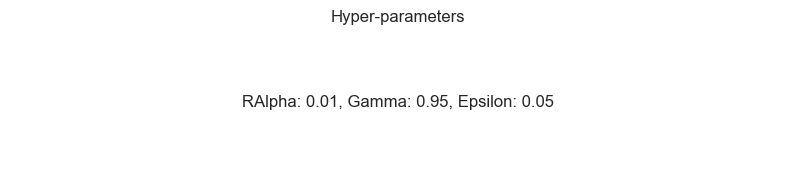

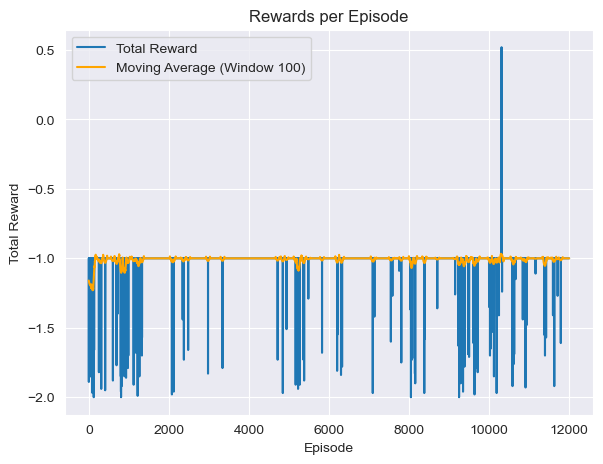

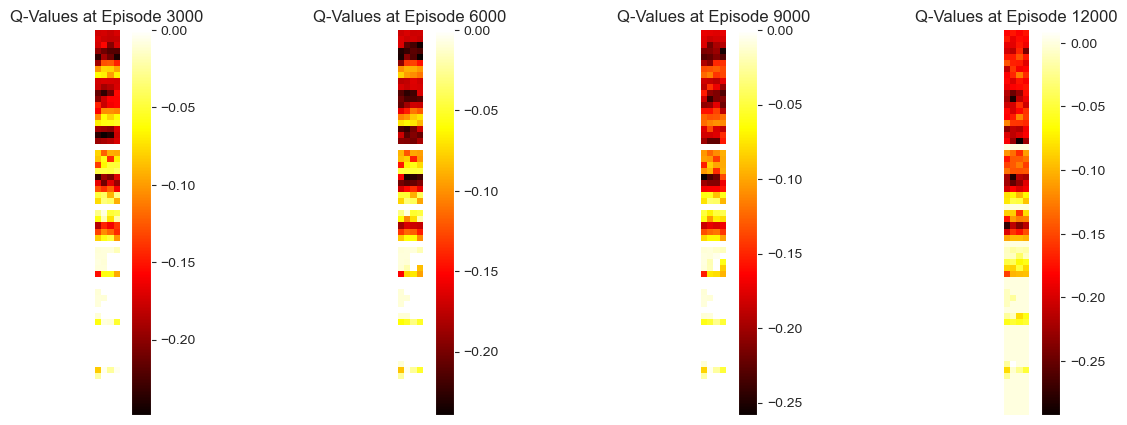

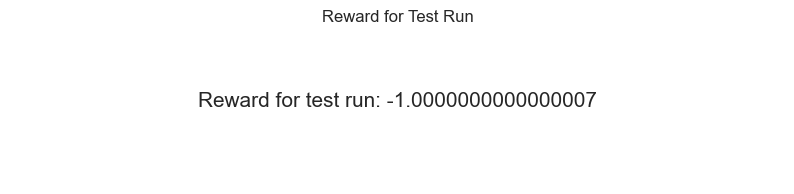

Episode 9 diead after 13 with reward -1.1199999999999999.
Episode 10 diead after 7 with reward -1.06.
Episode 11 diead after 33 with reward -1.32.
Episode 13 diead after 77 with reward -1.7600000000000005.
Episode 33 diead after 51 with reward -1.5000000000000002.
Episode 37 diead after 11 with reward -1.1.
Episode 39 diead after 27 with reward -1.26.
Episode 55 diead after 85 with reward -1.8400000000000005.
Episode 57 diead after 31 with reward -1.3.
Episode 90 diead after 33 with reward -1.32.
Episode 93 diead after 82 with reward -1.8100000000000005.
Episode 103 diead after 52 with reward -1.5100000000000002.
Episode 115 diead after 54 with reward -1.5300000000000002.
Episode 155 diead after 52 with reward -1.5100000000000002.
Episode 159 diead after 85 with reward -1.8400000000000005.
Episode 188 diead after 29 with reward -1.28.
Episode 191 diead after 71 with reward -1.7000000000000004.
Episode 202 diead after 71 with reward -1.7000000000000004.
Episode 244 diead after 35 with r

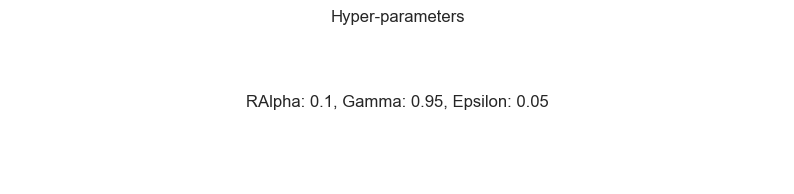

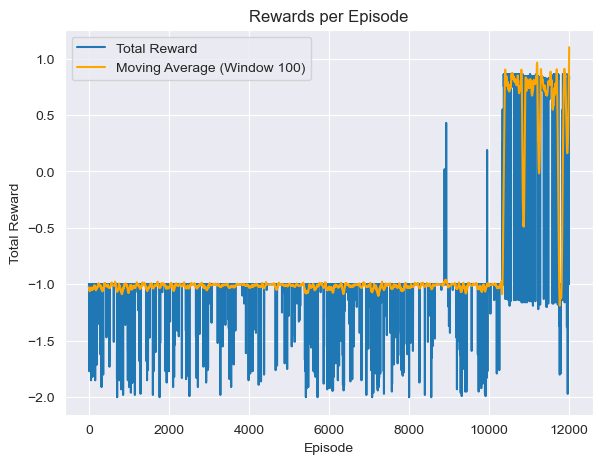

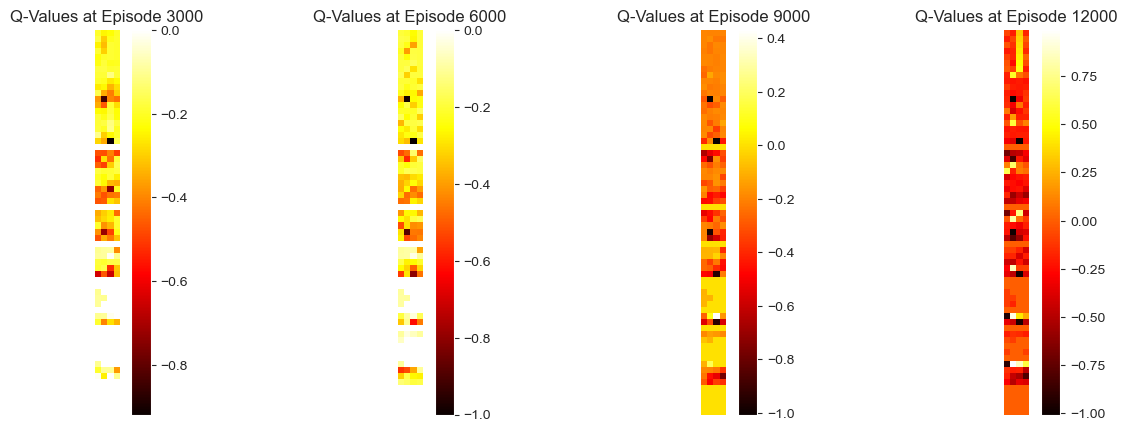

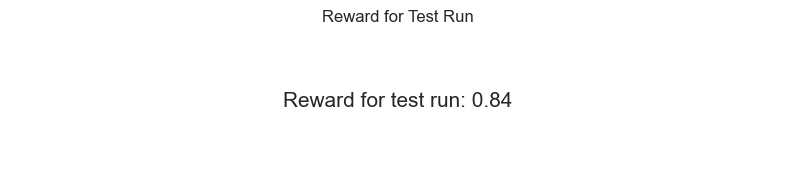

Episode 11 diead after 62 with reward -1.6100000000000003.
Episode 13 diead after 49 with reward -1.4800000000000002.
Episode 16 diead after 7 with reward -1.06.
Episode 20 diead after 55 with reward -1.5400000000000003.
Episode 28 diead after 9 with reward -1.08.
Episode 35 diead after 35 with reward -1.34.
Episode 52 diead after 81 with reward -1.8000000000000005.
Episode 65 diead after 66 with reward -1.6500000000000004.
Episode 79 diead after 63 with reward -1.6200000000000003.
Episode 83 diead after 52 with reward -1.5100000000000002.
Episode 100 diead after 79 with reward -1.7800000000000005.
Episode 123 diead after 60 with reward -1.5900000000000003.
Episode 124 diead after 28 with reward -1.27.
Episode 139 diead after 25 with reward -1.24.
Episode 169 diead after 17 with reward -1.16.
Episode 188 diead after 72 with reward -1.7100000000000004.
Episode 209 diead after 23 with reward -1.22.
Episode 223 diead after 65 with reward -1.6400000000000003.
Episode 239 diead after 13 wit

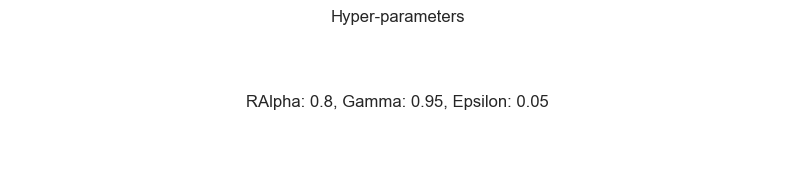

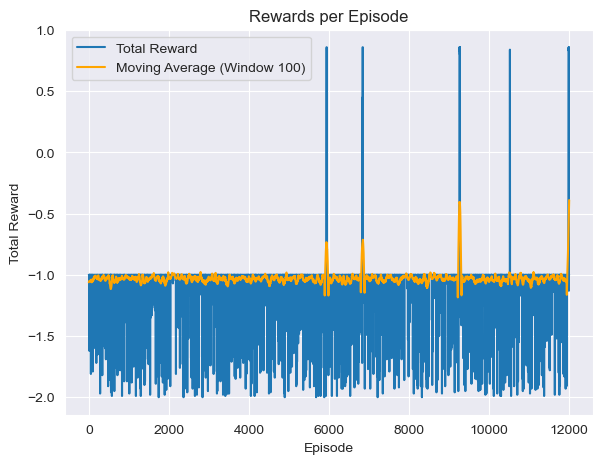

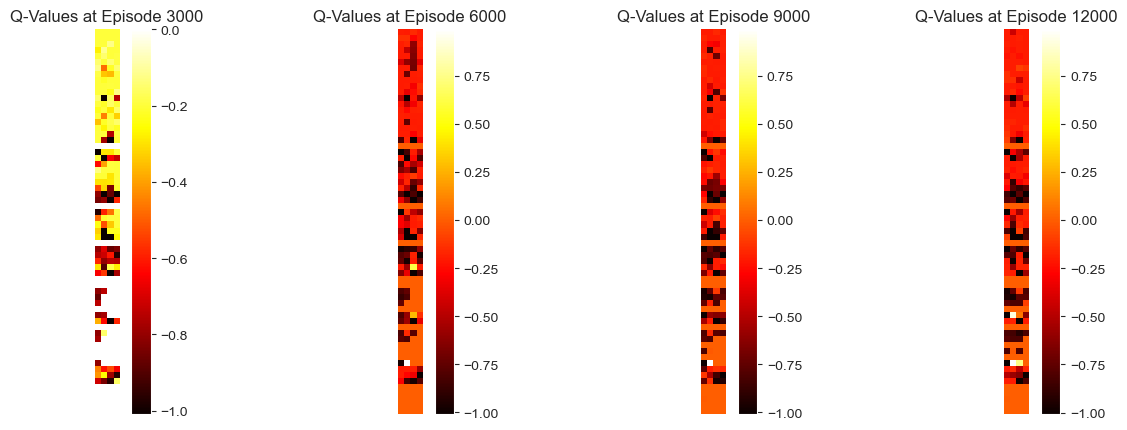

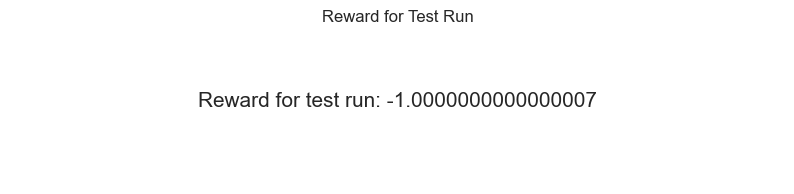

In [6]:
alphas = [0.01, 0.1, 0.8 ]

for i in alphas:
    constant_alpha_mc(is_slippery=False, alpha=i, episodes=12000)

### $\alpha = 0.01$

As discussed the first run define with $\alpha = 0.01$ update Q-table gradually, forming the actual best approximation for environment, so when the Policy gets to point where reward is already maximized it wont leave this behavior because updates with exploration are multiplied with small $\alpha$, leading to not change the Q-table enough to switch on exploring that certain path.

### $\alpha = 0.1$

With $\alpha = 0.1$, the learning rate strikes a balance between speed and stability. The agent updates the Q-table with relatively larger steps compared to a smaller alpha, allowing for faster learning and convergence to an optimal policy. However, this learning rate is not excessively high, which helps prevent the instability and oscillations around the optimal policy that can occur with very large alpha values.

### $\alpha = 0.8$

With $alpha = 0.8$, the learning rate is very high, causing the agent to update the Q-table quickly based on recent experiences. This rapid learning can help the agent find good actions quickly, but it also makes the learning process unstable.  The agent might frequently overshoot the best policy and keep changing its actions too much. 

The large updates can lead the agent to overreact to the latest rewards, so this instability can lead to the agent unlearning good behaviors it found earlier, making it hard to maintain a consistent and optimal policy.

### Gamma ($\gamma$) Discount Factor
The discount factor ($\gamma$) determines the importance of future rewards in the agent's Q-value updates. It essentially defines how much the agent values future rewards compared to immediate rewards.

Gamma ($\gamma$) acts as a multiplier that defines the weight of future rewards in the policy update process.

- **Large** gamma results in greater emphasis on future rewards, encouraging the agent to consider long-term benefits, which can lead to more strategic and farsighted behavior.

- **Small** gamma results in greater emphasis on immediate rewards, making the agent more myopic and potentially leading to short-sighted strategies.

Episode 6 diead after 52 with reward -1.5100000000000002.
Episode 9 diead after 53 with reward -1.5200000000000002.
Episode 10 diead after 65 with reward -1.6400000000000003.
Episode 15 diead after 37 with reward -1.36.
Episode 19 diead after 93 with reward -1.9200000000000006.
Episode 21 diead after 77 with reward -1.7600000000000005.
Episode 22 diead after 49 with reward -1.4800000000000002.
Episode 29 diead after 5 with reward -1.04.
Episode 30 diead after 51 with reward -1.5000000000000002.
Episode 33 diead after 81 with reward -1.8000000000000005.
Episode 35 diead after 46 with reward -1.4500000000000002.
Episode 36 diead after 44 with reward -1.4300000000000002.
Episode 37 diead after 7 with reward -1.06.
Episode 39 diead after 37 with reward -1.36.
Episode 41 diead after 27 with reward -1.26.
Episode 42 diead after 17 with reward -1.16.
Episode 46 diead after 97 with reward -1.9600000000000006.
Episode 48 diead after 5 with reward -1.04.
Episode 50 diead after 58 with reward -1.

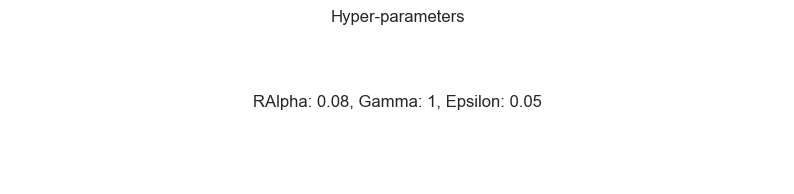

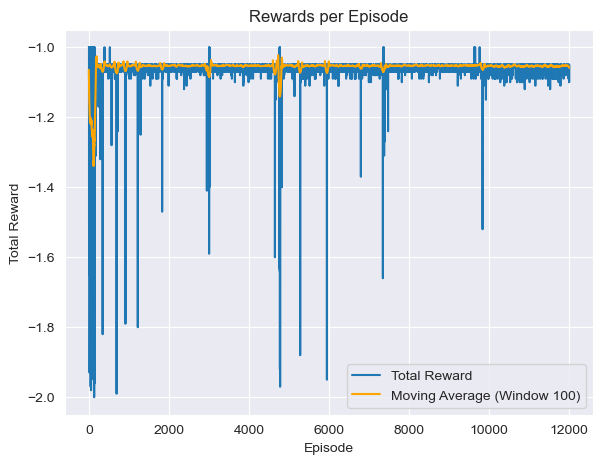

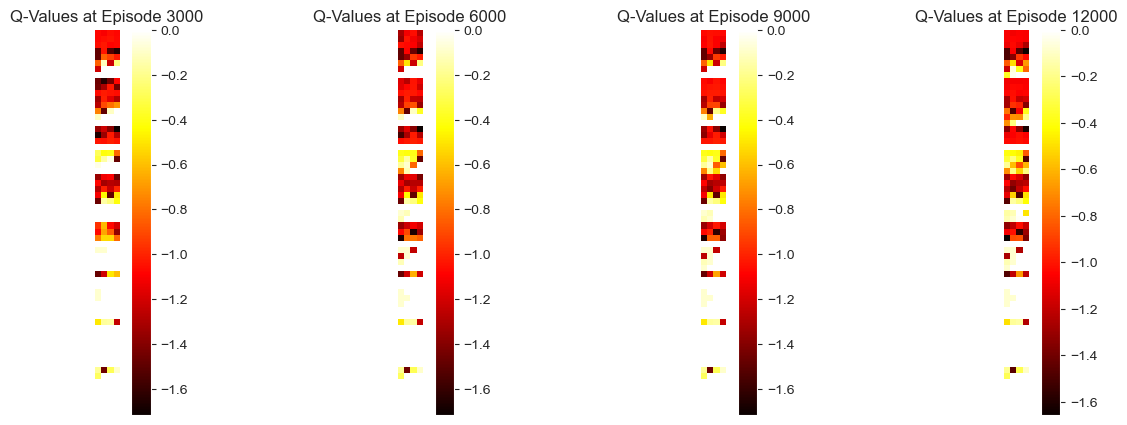

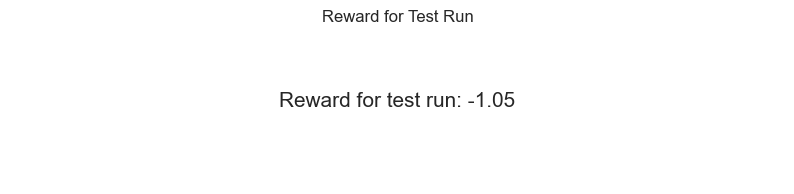

Episode 6 diead after 73 with reward -1.7200000000000004.
Episode 10 diead after 47 with reward -1.4600000000000002.
Episode 12 diead after 10 with reward -1.09.
Episode 14 diead after 21 with reward -1.2.
Episode 16 diead after 49 with reward -1.4800000000000002.
Episode 22 diead after 96 with reward -1.9500000000000006.
Episode 23 diead after 53 with reward -1.5200000000000002.
Episode 30 diead after 5 with reward -1.04.
Episode 34 diead after 86 with reward -1.8500000000000005.
Episode 35 diead after 50 with reward -1.4900000000000002.
Episode 38 diead after 93 with reward -1.9200000000000006.
Episode 39 diead after 68 with reward -1.6700000000000004.
Episode 48 diead after 68 with reward -1.6700000000000004.
Episode 69 diead after 25 with reward -1.24.
Episode 98 diead after 78 with reward -1.7700000000000005.
Episode 107 diead after 28 with reward -1.27.
Episode 120 diead after 40 with reward -1.3900000000000001.
Episode 123 diead after 23 with reward -1.22.
Episode 137 diead afte

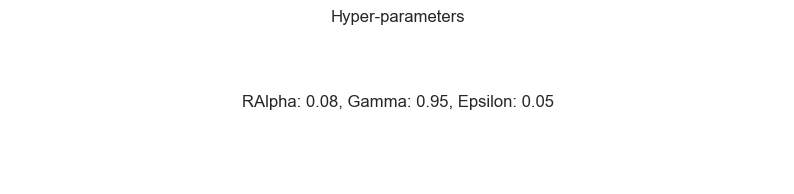

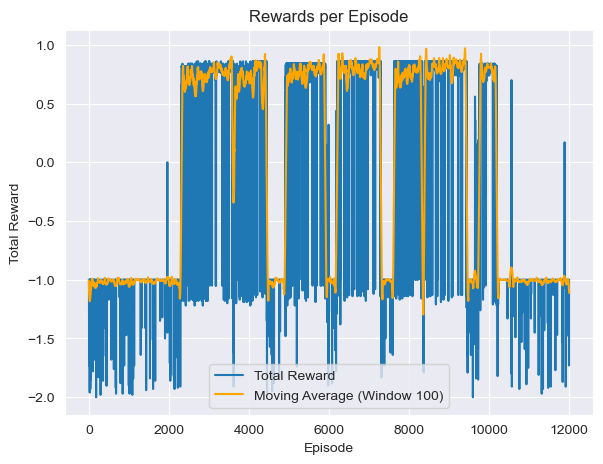

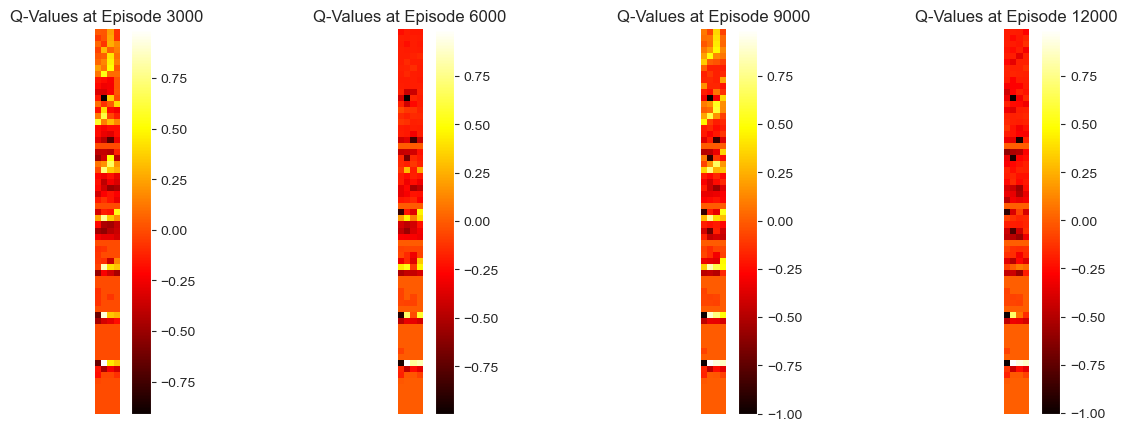

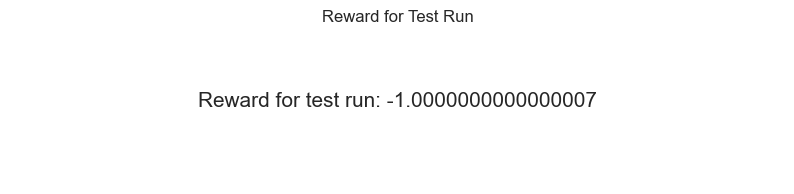

Episode 5 diead after 33 with reward -1.32.
Episode 8 diead after 30 with reward -1.29.
Episode 11 diead after 5 with reward -1.04.
Episode 17 diead after 12 with reward -1.1099999999999999.
Episode 21 diead after 7 with reward -1.06.
Episode 23 diead after 35 with reward -1.34.
Episode 26 diead after 15 with reward -1.14.
Episode 28 diead after 33 with reward -1.32.
Episode 35 diead after 80 with reward -1.7900000000000005.
Episode 39 diead after 99 with reward -1.9800000000000006.
Episode 41 diead after 41 with reward -1.4000000000000001.
Episode 42 diead after 72 with reward -1.7100000000000004.
Episode 43 diead after 81 with reward -1.8000000000000005.
Episode 45 diead after 89 with reward -1.8800000000000006.
Episode 46 diead after 23 with reward -1.22.
Episode 52 diead after 64 with reward -1.6300000000000003.
Episode 55 diead after 23 with reward -1.22.
Episode 59 diead after 46 with reward -1.4500000000000002.
Episode 61 diead after 90 with reward -1.8900000000000006.
Episode 6

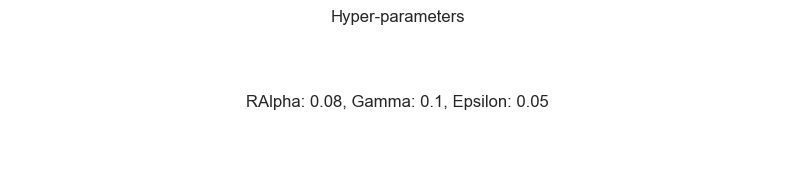

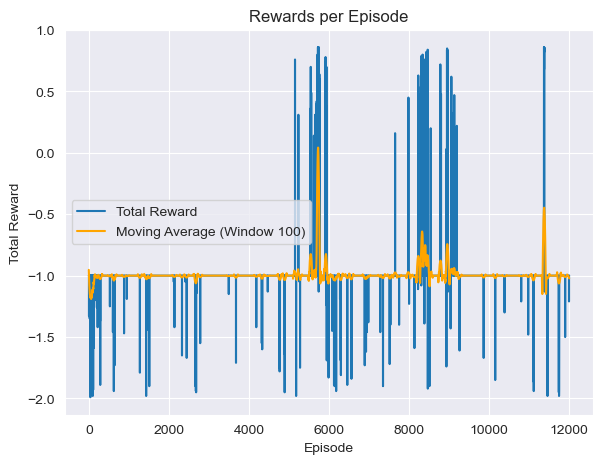

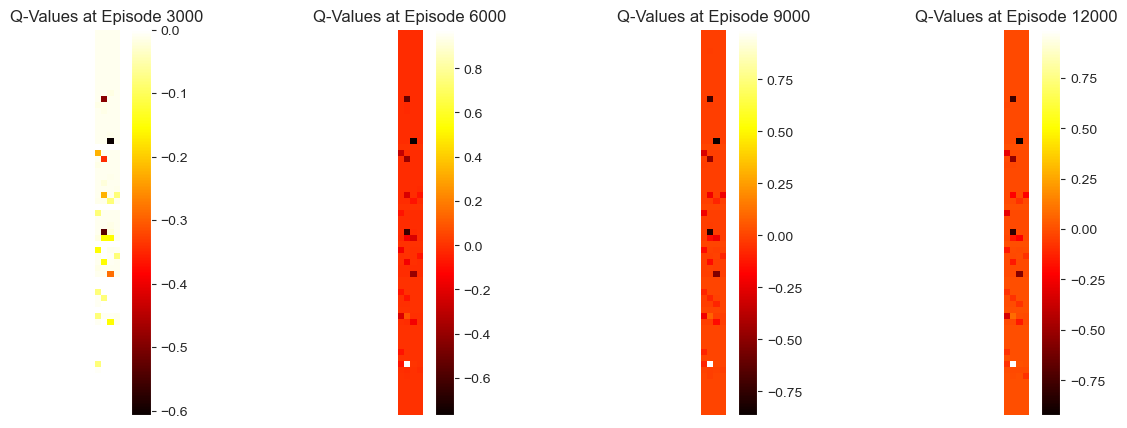

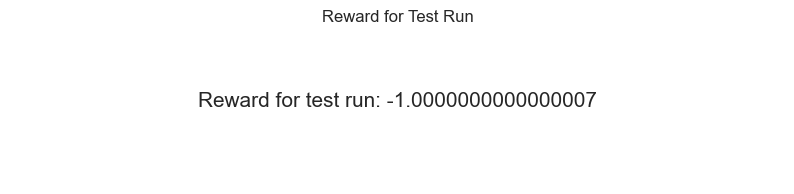

In [7]:
gammas = [1, 0.95, 0.1 ]

for i in gammas:
    constant_alpha_mc(is_slippery=False, gamma=i, episodes=12000)

### $\gamma = 1$
The agent gets confused and repeatedly fails on the same step, as seen in the repeated "died after 5 or 6 steps with reward -1.04" messages.
When $\gamma=1$, the agent equally weights all future rewards, leading to unstable and large Q-value updates. This instability causes the agent to frequently fail and not learn effectively. The accumulated negative returns from falling into holes dominate the Q-values, making it hard for the agent to recover and find optimal paths. Also it is possible that reward for finishing episode might be overlaped by cost of livings for other episodes.

### $\gamma = 0.95$
With $\gamma = 0.95$, the agent balances immediate and future rewards, leading to stable and strategic learning. It efficiently learns better policies by considering both short-term and long-term outcomes, resulting in improved performance.

### $\gamma = 0.1$
With $\gamma = 0.1$, the agent focuses mainly on immediate rewards, learning short-term strategies quickly but often missing out on better long-term rewards. This leads to not to die, but only states near finish are related to path to the terminal state, so it is hard to pass value about finish state to start state in Q-table.


## Epsilon ($\epsilon$)
 Exploration Rate
The exploration rate ($\epsilon$) determines the probability that the agent will choose a random action instead of the best-known action according to the Q-table. It defines the balance between exploration (trying new actions) and exploitation (using known actions).

- High epsilon encourages more exploration, allowing the agent to discover new, potentially better strategies, but can lead to more frequent suboptimal actions.
- Low epsilon encourages more exploitation, making the agent rely on its current knowledge, but can prevent the discovery of better strategies.

Episode 25 diead after 30 with reward -1.29.
Episode 29 diead after 5 with reward -1.04.
Episode 32 diead after 6 with reward -1.05.
Episode 137 diead after 39 with reward -1.3800000000000001.
Episode 164 diead after 17 with reward -1.16.
Episode 269 diead after 43 with reward -1.4200000000000002.
Episode 361 diead after 100 with reward -1.9900000000000007.
Episode 363 diead after 57 with reward -1.5600000000000003.
Episode 419 diead after 78 with reward -1.7700000000000005.
Episode 438 diead after 21 with reward -1.2.
Episode 456 diead after 53 with reward -1.5200000000000002.
Episode 596 diead after 95 with reward -1.9400000000000006.
Episode 860 diead after 96 with reward -1.9500000000000006.
Episode 1125 diead after 79 with reward -1.7800000000000005.
Episode 1128 diead after 29 with reward -1.28.
Episode 1130 diead after 9 with reward -1.08.
Episode 1184 diead after 33 with reward -1.32.
Episode 1214 diead after 44 with reward -1.4300000000000002.
Episode 1253 diead after 15 with 

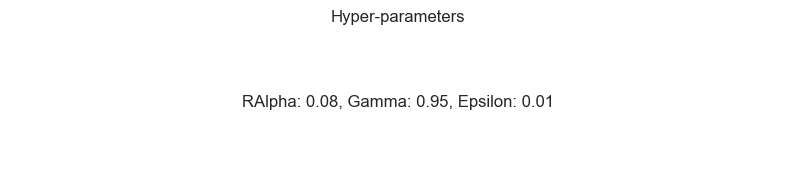

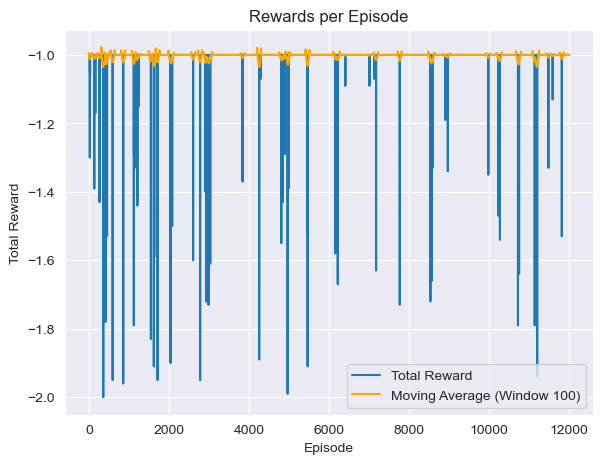

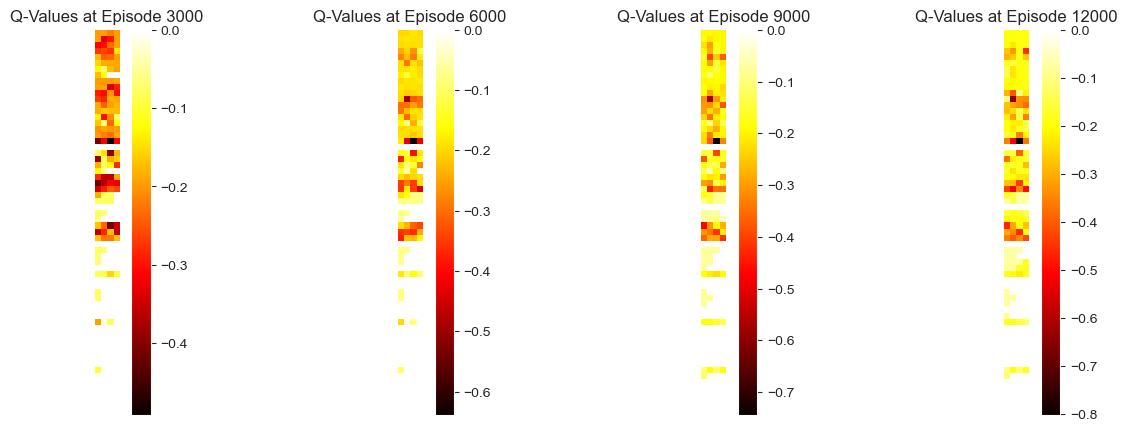

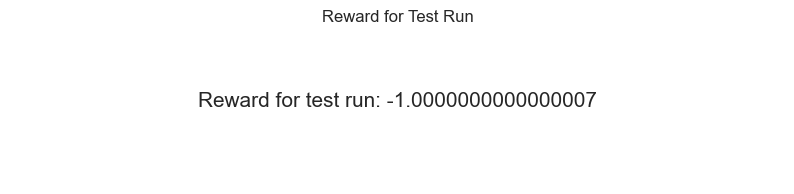

Episode 3 diead after 90 with reward -1.8900000000000006.
Episode 4 diead after 7 with reward -1.06.
Episode 6 diead after 32 with reward -1.31.
Episode 7 diead after 89 with reward -1.8800000000000006.
Episode 8 diead after 53 with reward -1.5200000000000002.
Episode 12 diead after 62 with reward -1.6100000000000003.
Episode 13 diead after 65 with reward -1.6400000000000003.
Episode 15 diead after 99 with reward -1.9800000000000006.
Episode 18 diead after 64 with reward -1.6300000000000003.
Episode 19 diead after 73 with reward -1.7200000000000004.
Episode 22 diead after 35 with reward -1.34.
Episode 29 diead after 79 with reward -1.7800000000000005.
Episode 39 diead after 22 with reward -1.21.
Episode 49 diead after 69 with reward -1.6800000000000004.
Episode 55 diead after 73 with reward -1.7200000000000004.
Episode 57 diead after 39 with reward -1.3800000000000001.
Episode 69 diead after 88 with reward -1.8700000000000006.
Episode 70 diead after 34 with reward -1.33.
Episode 85 die

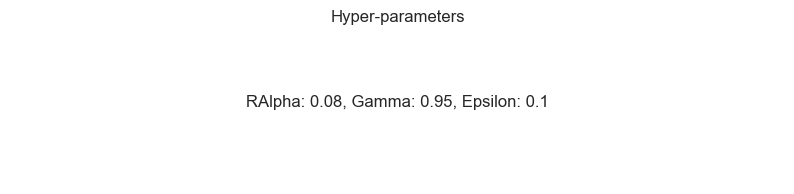

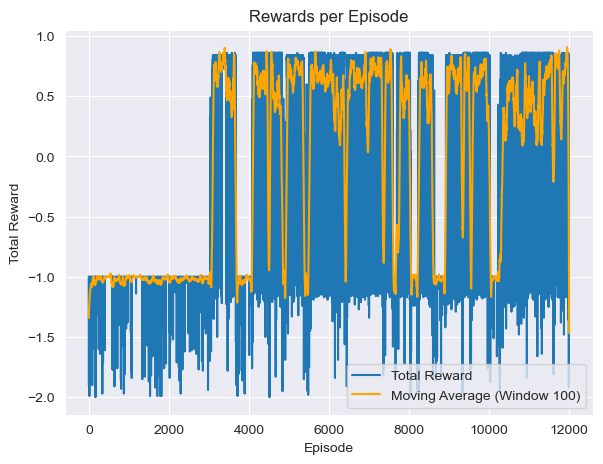

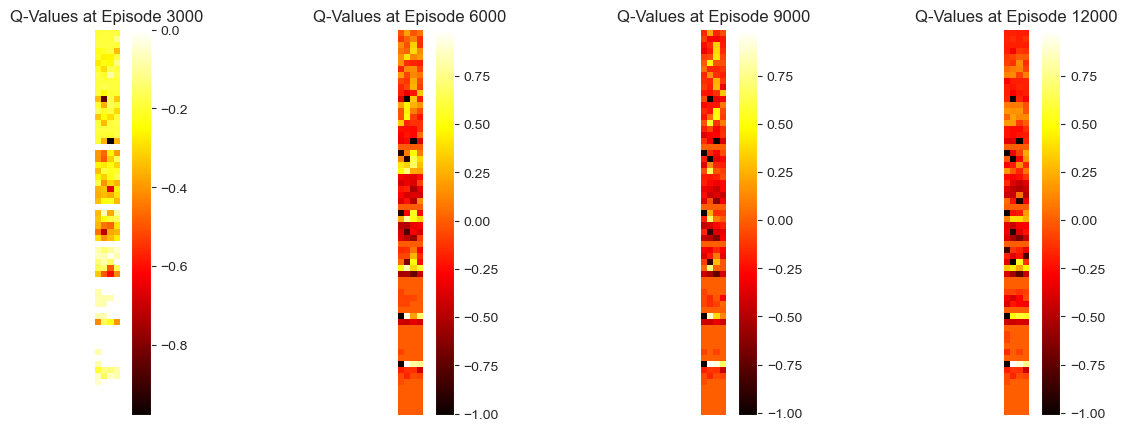

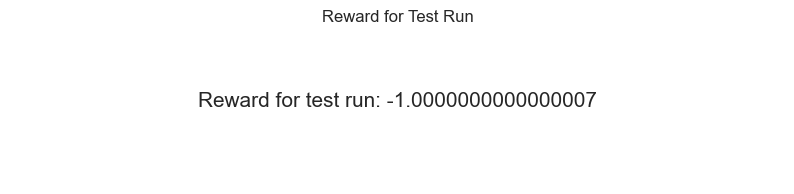

Episode 0 diead after 31 with reward -1.3.
Episode 1 diead after 61 with reward -1.6000000000000003.
Episode 2 diead after 11 with reward -1.1.
Episode 3 diead after 46 with reward -1.4500000000000002.
Episode 4 diead after 20 with reward -1.19.
Episode 5 diead after 26 with reward -1.25.
Episode 6 diead after 49 with reward -1.4800000000000002.
Episode 7 diead after 18 with reward -1.17.
Episode 8 diead after 40 with reward -1.3900000000000001.
Episode 10 diead after 17 with reward -1.16.
Episode 11 diead after 14 with reward -1.13.
Episode 12 diead after 68 with reward -1.6700000000000004.
Episode 13 diead after 41 with reward -1.4000000000000001.
Episode 14 diead after 18 with reward -1.17.
Episode 15 diead after 21 with reward -1.2.
Episode 16 diead after 90 with reward -1.8900000000000006.
Episode 17 diead after 20 with reward -1.19.
Episode 18 diead after 37 with reward -1.36.
Episode 19 diead after 25 with reward -1.24.
Episode 21 diead after 68 with reward -1.6700000000000004.


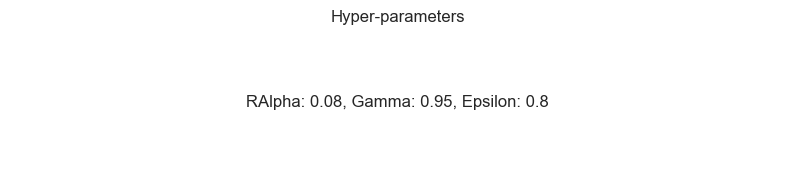

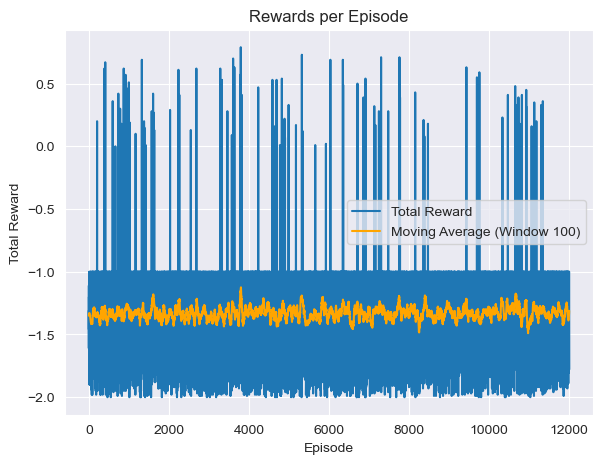

KeyboardInterrupt: 

In [8]:
epssilons = [0.01, 0.1, 0.8]

for i in epssilons:
    constant_alpha_mc(is_slippery=False, epsilon=i, episodes=12000)

### $\epsilon = 0.01$
With $\epsilon = 0.01$, the agent primarily exploits known actions, exploring only 1% of the time. Such low exploration didn't get agent to optimal policy, since it was almost always choosing the path defined with Q-table maximum values, so didn't learn the environment good enough to determine optimal policy.

### $\epsilon = 0.1$
With $\epsilon = 0.1$, the agent strikes a balance between exploration and exploitation. The agent tries new actions 10% of the time, which allows it to discover better strategies while mostly exploiting known good actions. This balance typically results in efficient learning and improved performance as the agent refines its policy.

### $\epsilon = 0.8$
With $\epsilon = 0.8$, the agent explores very frequently, trying new actions 80% of the time. This high exloration rate just makes the agent to explore the environment almost all the time without forming and mastering one optimal path, such epsilon have sense in the begining of training, to find some strategy and then gradually decrease and focus on exploring this certain policy with a bit of exploarrtions around it.


### Configurations That Confuse the Agent

1. **High Gamma $(\gamma = 1)$**:
    This causes unstable and large Q-value updates, making the agent frequently fail and struggle to stabilize its policy. Negative returns from falling into holes dominate, and rewards for finishing episodes might be overshadowed by ongoing costs.


2. **High Alpha ($\alpha = 0.8$)**:
   Rapid learning causes instability, with the agent frequently changing its actions and overshooting the best policy. It overreacts to recent rewards and unlearns good behaviors.


3. **High Epsilon ($\epsilon = 0.8$)**:
    Constant exploration prevents the agent from forming and mastering an optimal path, leading to inconsistent performance.


4. **Low Epsilon ($\epsilon = 0.01$)**:
    It relies too much on known actions and doesn't explore enough to find the best strategies, resulting in suboptimal learning.


5. **Low Gamma ($\gamma = 0.1$)**:
    It quickly learns short-term strategies but misses out on better long-term rewards, leading to suboptimal policies.


#### The agent struggles under these conditions:
- **High Gamma ($\gamma = 1$)**: Unstable updates and frequent failures.
- **High Alpha ($\alpha = 0.8$)**: Rapid, unstable learning.
- **High Epsilon ($\epsilon = 0.8$)**: Excessive exploration and inconsistent policies.

#### The agent doesn't learn well with:
- **Low Epsilon ($\epsilon = 0.01$)**: Insufficient exploration.
- **Low Gamma ($\gamma = 0.1$)**: Focus on immediate rewards, missing long-term benefits.
